# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Import the dataset 

In [2]:
df = pd.read_csv('SeoulBikeData.csv',encoding='cp1252')

### This dataframe presents the Bikes Rented in this city of Seoul. It is presented as a time series which presents the data with a step of an hour.
For each hour, the dataframe mainly presents weather conditions and information about the day.

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


#  
# Step 1 : Exploratory Data Analysis and Preprocessing

In [5]:
print(f'The DataFrame contains {df.shape[0]} lines and {df.shape[1]} columns')

The DataFrame contains 8760 lines and 14 columns


### Variables Presentation
Here are all the columns of the DataSet :
<li>Date : The day of the day, during 365 days, type : str                  
<li>y : Number of rented bikes per hour which is the target, type : int
<li>Hour: The hour of the day, type : int
<li>Temperature(°C): Temperature per hour, type : Float
<li>Humidity(%): Humidity in the air in %, type : int            
<li>Wind speed (m/s) : Speed of the wind in m/s, type : Float
<li>Visibility (10m): Visibility in m, type : int
<li>Dew point temperature(°C): Temperature at the beggining of the day, type : Float
<li>Solar Radiation (MJ/m2): Sun contribution, type : Float
<li>Rainfall(mm): Amount of rain in mm, type : Float
<li>Snowfall (cm): Amount of snow in cm, type : Float
<li>Seasons: Season of the year, type : str
<li>Holiday: If it is holiday period, type: str
<li>Functioning Day: If it is a Functioning Day, type : str

### We mainly will have numeric values, datetime and str

In [6]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object


### Here is the statitical description of the features

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


###  Verify that there are no missing values

In [8]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### We convert as datetime the series 'Date' and 'Hour'

In [9]:
df['Date and Time'] = pd.to_datetime(df['Date']+' '+df['Hour'].astype('string').str.zfill(2)+':00',format="%d/%m/%Y %H:%M")
df = df.drop(['Date','Hour'],axis=1)

### Now Renaming some columns

In [10]:
df = df.rename({'Rented Bike Count':'Bikes Rented',
                'Temperature(�C)':'Temperature(°C)',
                'Dew point temperature(�C)':'Dew point temperature(°C)'}, axis=1)

##  
### Here are the correlations between variables

#### We can see that on the target variable line the most correlated variables to the rent are :
<ul>
<li>the temperature
<li>the dew point temperature
<li>the solar radiation
</ul>

##### (The dew point is a temperature which is so cold that the vapor becomes liquid)

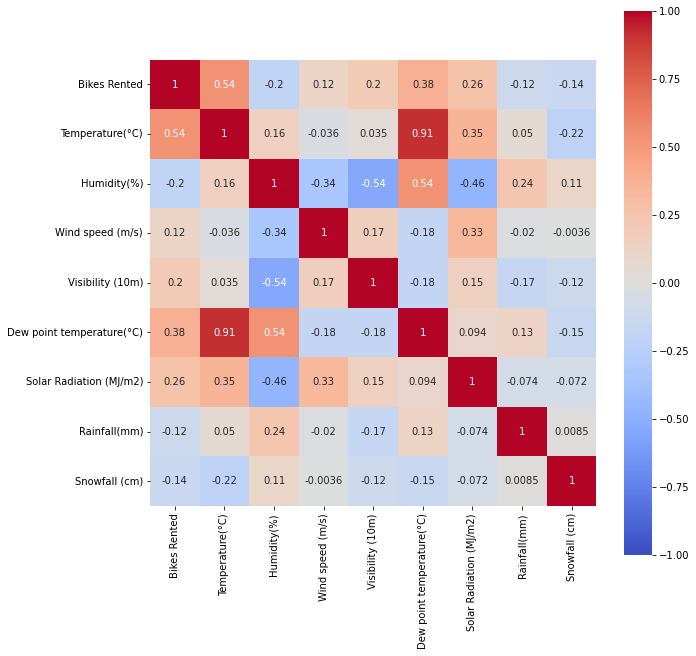

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True,
            square=True);

### We see that there is a hyper correlation between columns 'Temperature(°C)' and 'Dew point temperature(°C)'  so we can drop the column 'Dew point temperature(°C)' as they have the same variations.

In [12]:
df = df.drop(['Dew point temperature(°C)'],axis=1)
df.head()

,Bikes Rented,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Date and Time
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 00:00:00
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00


#### This is the list of sorted correlation of variables to the target

In [13]:
pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Bikes Rented'],columns=['Correlation to the target'])

,Correlation to the target
Bikes Rented,1.000000
Temperature(°C),0.538558
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


#  
# Step 2 : Data Preparation and data Visualisation

### Creating variables

###### We create a column feature which gives the day of the week and the month corresponding to the date

In [14]:
df['Day or Night'] = df['Date and Time'].dt.hour.apply(lambda x : 'Night' if (x >20 or x<5) else 'Day')

In [15]:
df['Week Day'] = df["Date and Time"].dt.day_name()

In [16]:
df['Month'] = df['Date and Time'].dt.month

### Plotting variables to the target 

#### On this first plot, we see a high raise between april to autumn of bikes rent

<AxesSubplot:xlabel='Month'>

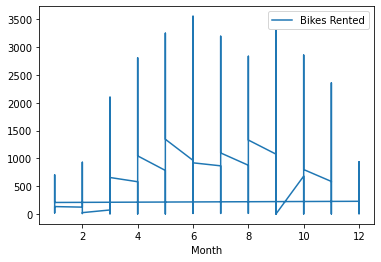

In [17]:
df.plot(x='Month',y='Bikes Rented',kind='line')

#### So let's focus on the seasons where we have the most rents
###### We can see that as we expected, summer is the season in which we have the most rents.
Let's try to understand why summer is the season with the most rents

In [18]:
pd.DataFrame(df.groupby('Seasons').sum()['Bikes Rented'].sort_values(ascending=False))

,Bikes Rented
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


<AxesSubplot:ylabel='Bikes Rented'>

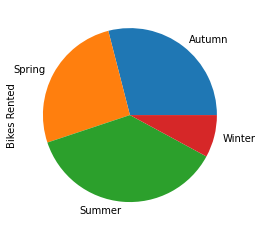

In [19]:
df.groupby('Seasons').sum()['Bikes Rented'].plot.pie()

##  
### Let's verify that it is linked to the solar Radiation
This plot explains the high correlation with the feature 'solar Radiation' and 'Summer'

In [20]:
pd.DataFrame(df.groupby('Seasons').sum()['Solar Radiation (MJ/m2)'].sort_values(ascending=False))

,Solar Radiation (MJ/m2)
Seasons,
Summer,1680.85
Spring,1520.84
Autumn,1139.65
Winter,644.07


<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

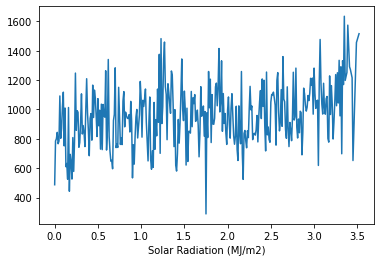

In [21]:
df.groupby('Solar Radiation (MJ/m2)').mean()['Bikes Rented'].plot()

#### Here we have a repartition of the rents by Day and night

In [22]:
pd.DataFrame(df.groupby('Day or Night').sum()['Bikes Rented'].sort_values(ascending=False))

,Bikes Rented
Day or Night,
Day,4628156
Night,1544158


<AxesSubplot:xlabel='Day or Night'>

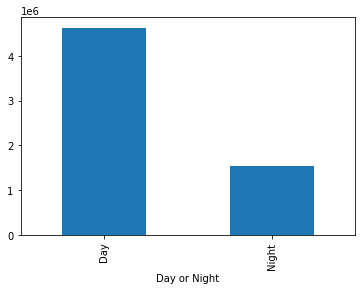

In [23]:
df.groupby('Day or Night').sum()['Bikes Rented'].plot.bar()

#### Days with highest rented bike are work days
So we suppose people rent bikes to go to work or school 

In [24]:
pd.DataFrame(df.groupby('Week Day').sum()['Bikes Rented'].sort_values(ascending=False))

,Bikes Rented
Week Day,
Friday,950334
Wednesday,923956
Monday,911743
Saturday,885492
Thursday,861999
Tuesday,858596
Sunday,780194


<AxesSubplot:xlabel='Week Day'>

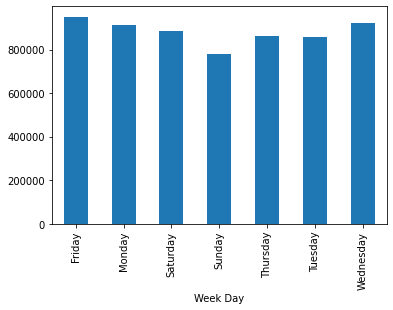

In [25]:
df.groupby('Week Day').sum()['Bikes Rented'].plot.bar()

##

#### Korean people like to ride bikes when it is pretty hot around 25°C in average

<AxesSubplot:xlabel='Temperature(°C)'>

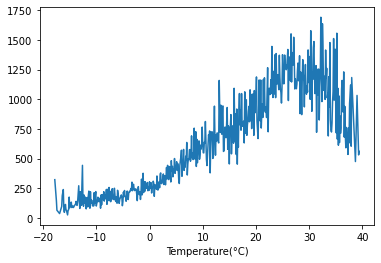

In [26]:
df.groupby('Temperature(°C)').mean()['Bikes Rented'].plot()

#### Let's do a visualisation during the holidays
It means that koreans rent bikes to go to school or work 

<AxesSubplot:ylabel='Bikes Rented'>

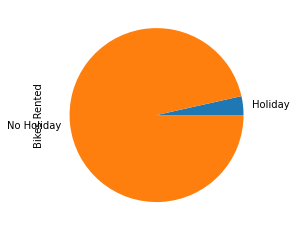

In [27]:
df.groupby('Holiday').sum()['Bikes Rented'].plot.pie()

#### We see that holiday rent are very low so let's see on which period extends holidays
The shape of the result is 240 row and 16 columns, it means that there are only 240 days of holidays in the dataset which is very short.
And that explains why the proportion of rents during holiday is low. So we understand that this column is not that important.

In [28]:
df.loc[df['Holiday'] == 'Holiday'].shape

(432, 15)

### Let's plot the rent of bikes following the state of the  weather

#### We can see that even if it rains a lot of korean rent bikes, here for example even if we have 20 mm of rain there is a big peak of rented bikes

<AxesSubplot:xlabel='Rainfall(mm)'>

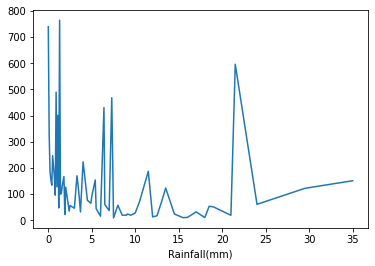

In [29]:
df.groupby('Rainfall(mm)').mean()['Bikes Rented'].plot()

#### We can see on the y-axis, the amount of rents is very low
When we have more than 0 cm of snow, the bike rents is much lower and it goes down as much as the snow increase

<AxesSubplot:xlabel='Snowfall (cm)'>

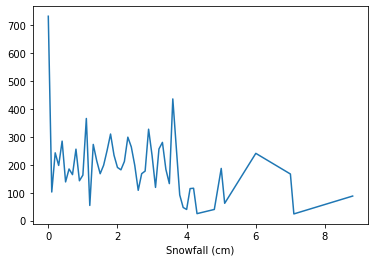

In [30]:
df.groupby('Snowfall (cm)').mean()['Bikes Rented'].plot()

### Checking for 

### Dropping the Features created for analysis

In [31]:
df.drop(['Day or Night','Week Day','Month'],axis=1,inplace=True)

#  
# Step 3 : Modeling
We have to keep in mind that the most correlated features to the target are : 
<ul>
<li>The Temperature </li>
<li>The Solar Radiation</li>
<li>The Visibility </li>
</ul>

### Specifing input and target variables

In [32]:
y = df['Bikes Rented'] 
X = df.drop('Bikes Rented',axis=1)

### Specifing Categorical and numerical Columns

In [33]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

### Creating a column transformer to manipulate the features

In [34]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### Creating the model (ExtraTrees)

In [36]:
model = ExtraTreesRegressor(n_jobs=-1,random_state=0)

### Creating the pipeline to work with the data 

In [37]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

### Validating the pipeline with cross-validation

In [38]:
-1 * cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_log_error')

array([0.59873631, 1.07028153, 0.59929381, 0.77446059, 2.88871213])

In [39]:
# gscv = GridSearchCV(estimator=pipeline,
#                     param_grid={
#                        'model__n_estimators': range(10,150,10),
#                        'model__min_samples_leaf': range(1,10,1),
#                        'model__min_samples_split': range(1,10,1)},
#                     scoring='neg_mean_squared_log_error',
#                     cv=5,
#                     n_jobs=-1)

In [40]:
# gscv.fit(X,y)

In [41]:
# gscv.best_score_

####  